In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *

# Enter the code to create a SparkSession
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
conf = SparkConf().setAppName('myApp') \
 .setMaster('local') 
sc = SparkContext(conf=conf) 
spark = SparkSession(sc) 

In [2]:
df = spark.read.format('csv').options(header=True).load('C:/users/Devi/NLP/BigData/ProjectBDA/carClaim/train.csv')
df.show(30, truncate=50)

+---------+-----------------+----------+-------------------+------------+------------------+----+-------+-----+---------+--------------+-----------------+-------------------------+-------+------+----------------------+-------+------------------+-----------------+----------------+------------+--------+-----------------+--------+-------------+--------------+------+-----+------+------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+-----------+--------+
|policy_id|    policy_tenure|age_of_car|age_of_policyholder|area_cluster|population_density|make|segment|model|fuel_type|    max_torque|        max_power|              engine_type|airbags|is_esc|is_adjustable_steering|is_tpms|is_parking_sensors|is_parking_camera|rear_brakes_type|displacement|cylinder|transmission_type|gear_box|steering_type

In [3]:
dt = spark.read.format('csv').options(header=True).load('C:/users/Devi/NLP/BigData/ProjectBDA/carClaim/test.csv')
dt.show(30, truncate=50)

+---------+-----------------+----------+-------------------+------------+------------------+----+-------+-----+---------+--------------+-----------------+---------------------+-------+------+----------------------+-------+------------------+-----------------+----------------+------------+--------+-----------------+--------+-------------+--------------+------+-----+------+------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+-----------+
|policy_id|    policy_tenure|age_of_car|age_of_policyholder|area_cluster|population_density|make|segment|model|fuel_type|    max_torque|        max_power|          engine_type|airbags|is_esc|is_adjustable_steering|is_tpms|is_parking_sensors|is_parking_camera|rear_brakes_type|displacement|cylinder|transmission_type|gear_box|steering_type|turning_radius|l

In [4]:
result = spark.read.format('csv').options(header=True).load('C:/users/Devi/NLP/BigData/ProjectBDA/carClaim/sample_submission.csv')
result.show(30, truncate=50)

+---------+--------+
|policy_id|is_claim|
+---------+--------+
|  ID58593|       1|
|  ID58594|       1|
|  ID58595|       1|
|  ID58596|       1|
|  ID58597|       1|
|  ID58598|       1|
|  ID58599|       1|
|  ID58600|       1|
|  ID58601|       1|
|  ID58602|       1|
|  ID58603|       1|
|  ID58604|       1|
|  ID58605|       1|
|  ID58606|       1|
|  ID58607|       1|
|  ID58608|       1|
|  ID58609|       1|
|  ID58610|       1|
|  ID58611|       1|
|  ID58612|       1|
|  ID58613|       1|
|  ID58614|       1|
|  ID58615|       1|
|  ID58616|       1|
|  ID58617|       1|
|  ID58618|       1|
|  ID58619|       1|
|  ID58620|       1|
|  ID58621|       1|
|  ID58622|       1|
+---------+--------+
only showing top 30 rows



In [5]:
df.printSchema()
dt.printSchema()
result.printSchema()

root
 |-- policy_id: string (nullable = true)
 |-- policy_tenure: string (nullable = true)
 |-- age_of_car: string (nullable = true)
 |-- age_of_policyholder: string (nullable = true)
 |-- area_cluster: string (nullable = true)
 |-- population_density: string (nullable = true)
 |-- make: string (nullable = true)
 |-- segment: string (nullable = true)
 |-- model: string (nullable = true)
 |-- fuel_type: string (nullable = true)
 |-- max_torque: string (nullable = true)
 |-- max_power: string (nullable = true)
 |-- engine_type: string (nullable = true)
 |-- airbags: string (nullable = true)
 |-- is_esc: string (nullable = true)
 |-- is_adjustable_steering: string (nullable = true)
 |-- is_tpms: string (nullable = true)
 |-- is_parking_sensors: string (nullable = true)
 |-- is_parking_camera: string (nullable = true)
 |-- rear_brakes_type: string (nullable = true)
 |-- displacement: string (nullable = true)
 |-- cylinder: string (nullable = true)
 |-- transmission_type: string (nullable =

In [6]:
# Print distinct values for particular columns
columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim']

for column in columns:
    df.select(column).distinct().sort(column).show()

+-----------------+
|    policy_tenure|
+-----------------+
|0.002735272840513|
|0.002739076804786|
|0.002740315011665|
|0.002747851054561|
|0.002749571040505|
|0.002750120003537|
|0.002762931455565|
|0.002764654470039|
|0.002768301058828|
|0.002768900638215|
|0.002770853710949|
|0.002771893273467|
|0.002771917589332|
|0.002772798922012|
| 0.00277288700797|
|0.002773005748767|
|0.002775147283016|
|0.002776876086524|
|0.002782401164926|
|0.002782678543186|
+-----------------+
only showing top 20 rows

+----------+
|age_of_car|
+----------+
|         0|
|      0.01|
|      0.02|
|      0.03|
|      0.04|
|      0.05|
|      0.06|
|      0.07|
|      0.08|
|      0.09|
|       0.1|
|      0.11|
|      0.12|
|      0.13|
|      0.14|
|      0.15|
|      0.16|
|      0.17|
|      0.18|
|      0.19|
+----------+
only showing top 20 rows

+-------------------+
|age_of_policyholder|
+-------------------+
|  0.288461538461538|
|  0.298076923076923|
|  0.307692307692308|
|  0.317307692307692|
| 

In [7]:
# Print distinct values for particular columns
columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating']

for column in columns:
    dt.select(column).distinct().sort(column).show()

+-----------------+
|    policy_tenure|
+-----------------+
|0.002745051196579|
|0.002745544788791|
|0.002747034501159|
|0.002747994940671|
|0.002753019205385|
|0.002753785091627|
|0.002759427602193|
|0.002764604423371|
|0.002770183835773|
|0.002774601299284|
| 0.00277907278365|
|0.002782481806645|
|0.002785199142261|
|0.002791475086914|
|0.002796811414699|
|0.002811511184285|
|0.002817834904417|
| 0.00281852987206|
|0.002826306979202|
|0.002826785497922|
+-----------------+
only showing top 20 rows

+----------+
|age_of_car|
+----------+
|         0|
|      0.01|
|      0.02|
|      0.03|
|      0.04|
|      0.05|
|      0.06|
|      0.07|
|      0.08|
|      0.09|
|       0.1|
|      0.11|
|      0.12|
|      0.13|
|      0.14|
|      0.15|
|      0.16|
|      0.17|
|      0.18|
|      0.19|
+----------+
only showing top 20 rows

+-------------------+
|age_of_policyholder|
+-------------------+
|  0.288461538461538|
|  0.298076923076923|
|  0.307692307692308|
|  0.317307692307692|
| 

In [8]:
# Kolom yang akan diubah tipe datanya
columns = ['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 
                      'is_parking_camera', 'is_front_fog_lights', 'is_rear_window_wiper', 
                      'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 
                      'is_power_door_locks', 'is_central_locking', 'is_power_steering', 
                      'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 
                      'is_ecw', 'is_speed_alert']

# Mengubah nilai 'yes' menjadi 1 dan 'no' menjadi 0
for column in columns:
    df = df.withColumn(column, when(col(column) == 'yes', 1).otherwise(0))
    dt = dt.withColumn(column, when(col(column) == 'yes', 1).otherwise(0))


# Daftar kolom yang ingin Anda ubah menjadi float
columns = ['policy_tenure', 'age_of_car', 'age_of_policyholder', 'turning_radius']

# Loop melalui setiap kolom dan mengonversi tipe datanya menjadi float
for column in columns:
    df = df.withColumn(column, col(column).cast('float'))
    dt = dt.withColumn(column, col(column).cast('float'))

# Daftar kolom yang ingin Anda ubah menjadi integer
columns = ['population_density', 'make','airbags', 'displacement','cylinder', 'gear_box', 'length', 'width', 'height', 'gross_weight', 'ncap_rating', 'is_claim']

# Loop melalui setiap kolom dan mengonversi tipe datanya menjadi integer
for column in columns:
    df = df.withColumn(column, col(column).cast('int'))
    if column != 'is_claim':
        dt = dt.withColumn(column, col(column).cast('int'))

df.printSchema()
dt.printSchema()

root
 |-- policy_id: string (nullable = true)
 |-- policy_tenure: float (nullable = true)
 |-- age_of_car: float (nullable = true)
 |-- age_of_policyholder: float (nullable = true)
 |-- area_cluster: string (nullable = true)
 |-- population_density: integer (nullable = true)
 |-- make: integer (nullable = true)
 |-- segment: string (nullable = true)
 |-- model: string (nullable = true)
 |-- fuel_type: string (nullable = true)
 |-- max_torque: string (nullable = true)
 |-- max_power: string (nullable = true)
 |-- engine_type: string (nullable = true)
 |-- airbags: integer (nullable = true)
 |-- is_esc: integer (nullable = false)
 |-- is_adjustable_steering: integer (nullable = false)
 |-- is_tpms: integer (nullable = false)
 |-- is_parking_sensors: integer (nullable = false)
 |-- is_parking_camera: integer (nullable = false)
 |-- rear_brakes_type: string (nullable = true)
 |-- displacement: integer (nullable = true)
 |-- cylinder: integer (nullable = true)
 |-- transmission_type: string

In [9]:
result = result.withColumn('is_claim', col('is_claim').cast('int'))
result.printSchema()

root
 |-- policy_id: string (nullable = true)
 |-- is_claim: integer (nullable = true)



In [10]:
df.summary().show()

+-------+---------+------------------+-------------------+-------------------+------------+------------------+------------------+-------+-----+---------+-------------+-----------------+-----------+------------------+------+----------------------+-------+------------------+-----------------+----------------+------------------+------------------+-----------------+-------------------+-------------+-------------------+------------------+------------------+------------------+------------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+------------------+-------------------+
|summary|policy_id|     policy_tenure|         age_of_car|age_of_policyholder|area_cluster|population_density|              make|segment|model|fuel_type|   max_torque|        max_power|engine_type|           airbags|is_es

In [11]:
dt.summary().show()

+-------+---------+------------------+-------------------+-------------------+------------+------------------+------------------+-------+-----+---------+-------------+-----------------+-----------+------------------+------+----------------------+-------+------------------+-----------------+----------------+------------------+------------------+-----------------+-------------------+-------------+-------------------+------------------+------------------+------------------+------------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+------------------+
|summary|policy_id|     policy_tenure|         age_of_car|age_of_policyholder|area_cluster|population_density|              make|segment|model|fuel_type|   max_torque|        max_power|engine_type|           airbags|is_esc|is_adjustable_stee

In [12]:
result.summary().show()

+-------+---------+--------+
|summary|policy_id|is_claim|
+-------+---------+--------+
|  count|    39063|   39063|
|   mean|     NULL|     1.0|
| stddev|     NULL|     0.0|
|    min|  ID58593|       1|
|    25%|     NULL|       1|
|    50%|     NULL|       1|
|    75%|     NULL|       1|
|    max|  ID97655|       1|
+-------+---------+--------+



In [13]:
df.select([count(when(isnan(c) | isnull(c), 1)).alias(c) for c in df.columns]).show()

+---------+-------------+----------+-------------------+------------+------------------+----+-------+-----+---------+----------+---------+-----------+-------+------+----------------------+-------+------------------+-----------------+----------------+------------+--------+-----------------+--------+-------------+--------------+------+-----+------+------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+-----------+--------+
|policy_id|policy_tenure|age_of_car|age_of_policyholder|area_cluster|population_density|make|segment|model|fuel_type|max_torque|max_power|engine_type|airbags|is_esc|is_adjustable_steering|is_tpms|is_parking_sensors|is_parking_camera|rear_brakes_type|displacement|cylinder|transmission_type|gear_box|steering_type|turning_radius|length|width|height|gross_weight|is_front_fo

In [14]:
dt.select([count(when(isnan(c) | isnull(c), 1)).alias(c) for c in dt.columns]).show()

+---------+-------------+----------+-------------------+------------+------------------+----+-------+-----+---------+----------+---------+-----------+-------+------+----------------------+-------+------------------+-----------------+----------------+------------+--------+-----------------+--------+-------------+--------------+------+-----+------+------------+-------------------+--------------------+---------------------+-----------------------+---------------+-------------------+------------------+-----------------+--------------------------------+-----------------------------+------+--------------+-----------+
|policy_id|policy_tenure|age_of_car|age_of_policyholder|area_cluster|population_density|make|segment|model|fuel_type|max_torque|max_power|engine_type|airbags|is_esc|is_adjustable_steering|is_tpms|is_parking_sensors|is_parking_camera|rear_brakes_type|displacement|cylinder|transmission_type|gear_box|steering_type|turning_radius|length|width|height|gross_weight|is_front_fog_lights|

In [15]:
result.select([count(when(isnan(c) | isnull(c), 1)).alias(c) for c in result.columns]).show()

+---------+--------+
|policy_id|is_claim|
+---------+--------+
|        0|       0|
+---------+--------+



In [63]:
df_filtered = df.filter(df['is_claim'] == 1)
df_selected = df_filtered.select('area_cluster', 'is_claim')
df_grouped = df_selected.groupBy('area_cluster').count()
df_grouped.show()

+------------+-----+
|area_cluster|count|
+------------+-----+
|          C6|   55|
|         C22|   17|
|         C21|   29|
|         C18|   26|
|          C3|  433|
|          C4|   51|
|         C11|   72|
|         C12|   87|
|         C14|  281|
|         C20|    5|
|          C5|  403|
|          C9|  136|
|         C16|   23|
|          C8|  954|
|         C13|  195|
|          C1|   76|
|          C2|  520|
|         C15|   38|
|          C7|  109|
|         C17|   19|
+------------+-----+
only showing top 20 rows



<Figure size 1200x800 with 0 Axes>

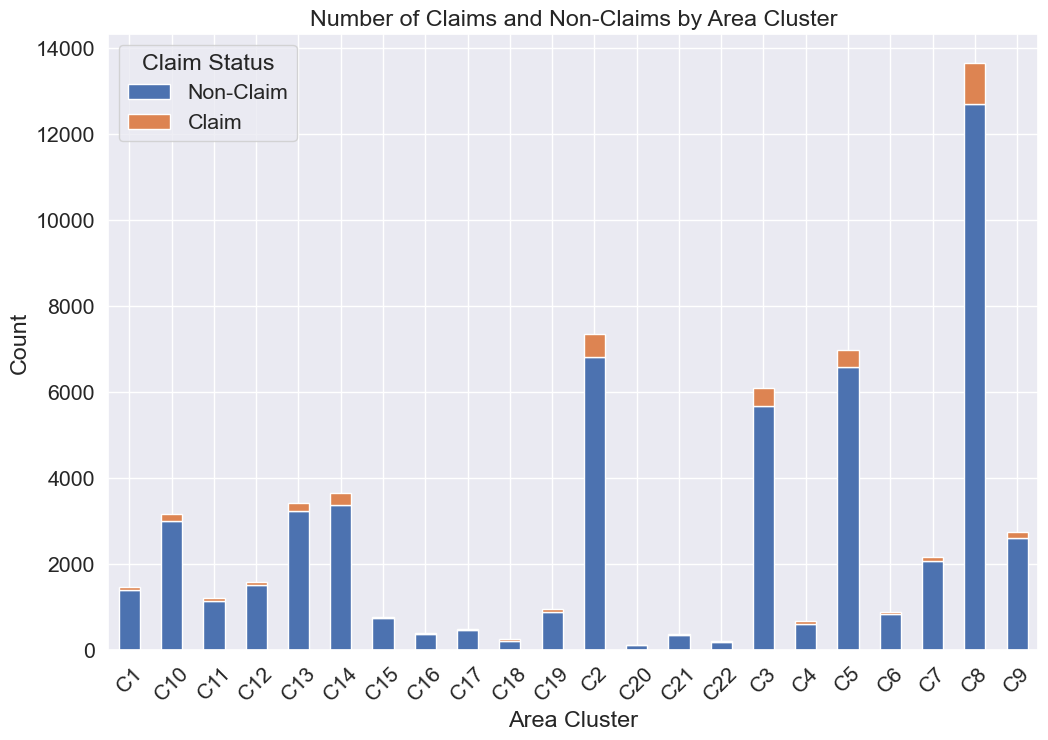

In [62]:
df_grouped = df.groupBy('area_cluster', 'is_claim').count()
df_pandas = df_grouped.toPandas()
df_pivot = df_pandas.pivot(index='area_cluster', columns='is_claim', values='count').fillna(0)
df_pivot.columns = ['Non-Claim', 'Claim']
plt.figure(figsize=(12, 8))
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Area Cluster')
plt.ylabel('Count')
plt.title('Number of Claims and Non-Claims by Area Cluster')
plt.xticks(rotation=45)
plt.legend(title='Claim Status', labels=['Non-Claim', 'Claim'])
plt.show()

In [66]:
df_max_density = df.groupBy('area_cluster').agg(max('population_density').alias('max_population_density'))
df_sorted = df_max_density.sort(col('max_population_density').desc())
df_sorted.show()
max_density_cluster = df_sorted.first()
print(f"Area cluster with the highest population density: {max_density_cluster['area_cluster']} with density {max_density_cluster['max_population_density']}")

+------------+----------------------+
|area_cluster|max_population_density|
+------------+----------------------+
|         C10|                 73430|
|         C17|                 65567|
|         C18|                 35036|
|         C12|                 34791|
|          C5|                 34738|
|         C19|                 27742|
|          C2|                 27003|
|          C4|                 21622|
|         C20|                 20905|
|          C9|                 17804|
|         C22|                 16733|
|         C16|                 16206|
|          C6|                 13051|
|          C8|                  8794|
|         C14|                  7788|
|          C7|                  6112|
|         C11|                  6108|
|         C13|                  5410|
|          C1|                  4990|
|          C3|                  4076|
+------------+----------------------+
only showing top 20 rows

Area cluster with the highest population density: C10 with den

In [67]:
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("is_parking_sensors").agg(count("*").alias("claim_count"))
df_grouped.show()
total_claims = df_claims.count()
df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()
parking_sensors_claims = df_claims.filter(col("is_parking_sensors") == 1).count()
no_parking_sensors_claims = df_claims.filter(col("is_parking_sensors") == 0).count()

if parking_sensors_claims > no_parking_sensors_claims:
    print("Kebanyakan mobil yang melakukan klaim mempunyai sensor parkir.")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak mempunyai sensor parkir.")

+------------------+-----------+
|is_parking_sensors|claim_count|
+------------------+-----------+
|                 0|       3748|
+------------------+-----------+

+------------------+-----------+----------+
|is_parking_sensors|claim_count|percentage|
+------------------+-----------+----------+
|                 0|       3748|     100.0|
+------------------+-----------+----------+

Kebanyakan mobil yang melakukan klaim tidak mempunyai sensor parkir.


<Figure size 1200x800 with 0 Axes>

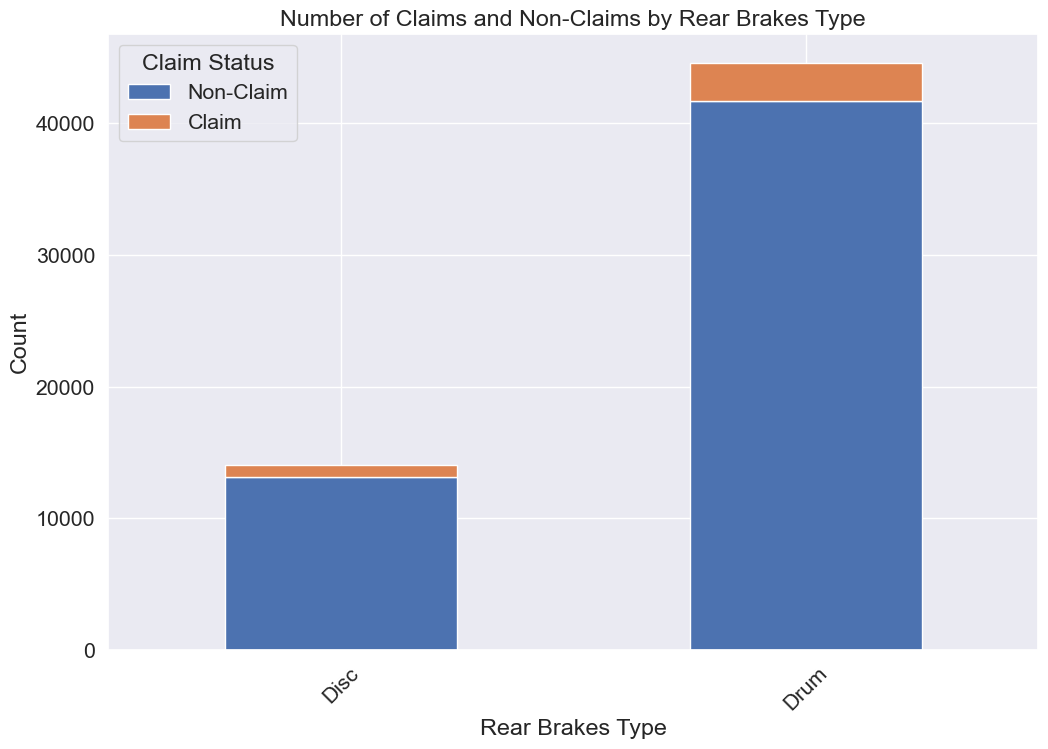

In [71]:
df_grouped = df.groupBy("is_claim", "rear_brakes_type").agg(count("*").alias("count"))
df_pandas = df_grouped.toPandas()
df_pivot = df_pandas.pivot(index='rear_brakes_type', columns='is_claim', values='count').fillna(0)
df_pivot.columns = ['Non-Claim', 'Claim']
plt.figure(figsize=(12, 8))
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('Rear Brakes Type')
plt.ylabel('Count')
plt.title('Number of Claims and Non-Claims by Rear Brakes Type')
plt.xticks(rotation=45)
plt.legend(title='Claim Status', labels=['Non-Claim', 'Claim'])
plt.show()

In [72]:
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("rear_brakes_type").agg(count("*").alias("claim_count"))
df_grouped.show()
total_claims = df_claims.count()
df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()
parking_sensors_claims = df_claims.filter(col("rear_brakes_type") == 'Disc').count()
no_parking_sensors_claims = df_claims.filter(col("rear_brakes_type") == 'Drum').count()

if parking_sensors_claims > no_parking_sensors_claims:
    print("Kebanyakan mobil yang melakukan klaim mempunyai sensor parkir.")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak mempunyai sensor parkir.")

+----------------+-----------+
|rear_brakes_type|claim_count|
+----------------+-----------+
|            Drum|       2847|
|            Disc|        901|
+----------------+-----------+

+----------------+-----------+-----------------+
|rear_brakes_type|claim_count|       percentage|
+----------------+-----------+-----------------+
|            Drum|       2847|75.96051227321237|
|            Disc|        901|24.03948772678762|
+----------------+-----------+-----------------+

Kebanyakan mobil yang melakukan klaim tidak mempunyai sensor parkir.


In [74]:
df_claims = df.filter(col("is_claim") == 1)
df_grouped = df_claims.groupBy("is_adjustable_steering").agg(count("*").alias("claim_count"))
df_grouped.show()
total_claims = df_claims.count()
df_with_percentage = df_grouped.withColumn("percentage", (col("claim_count") / total_claims) * 100)
df_with_percentage.show()
adjustable_steering_claims = df_claims.filter(col("is_adjustable_steering") == 1).count()
no_adjustable_steering_claims = df_claims.filter(col("is_adjustable_steering") == 0).count()

if parking_sensors_claims > no_parking_sensors_claims:
    print("Kebanyakan mobil yang melakukan klaim mempunyai adjustable steering.")
else:
    print("Kebanyakan mobil yang melakukan klaim tidak mempunyai adjustable steering.")

+----------------------+-----------+
|is_adjustable_steering|claim_count|
+----------------------+-----------+
|                     0|       3748|
+----------------------+-----------+

+----------------------+-----------+----------+
|is_adjustable_steering|claim_count|percentage|
+----------------------+-----------+----------+
|                     0|       3748|     100.0|
+----------------------+-----------+----------+

Kebanyakan mobil yang melakukan klaim tidak mempunyai adjustable steering.


In [50]:
final_df = df.select(['policy_id','age_of_car', 'age_of_policyholder', 'population_density', 'is_parking_sensors', 'is_parking_camera', 'is_claim' ])
final_dt = dt.select(['policy_id', 'age_of_car', 'age_of_policyholder', 'population_density', 'is_parking_sensors', 'is_parking_camera' ])

In [51]:
#untuk testing model maka akan menggunakan sample data sebanyak 1000 saja 
sample_df = final_df.limit(10000)
sample_df.show()

+---------+----------+-------------------+------------------+------------------+-----------------+--------+
|policy_id|age_of_car|age_of_policyholder|population_density|is_parking_sensors|is_parking_camera|is_claim|
+---------+----------+-------------------+------------------+------------------+-----------------+--------+
|  ID00001|      0.05|          0.6442308|              4990|                 0|                0|       0|
|  ID00002|      0.02|              0.375|             27003|                 0|                0|       0|
|  ID00003|      0.02|          0.3846154|              4076|                 0|                0|       0|
|  ID00004|      0.11|         0.43269232|             21622|                 0|                0|       0|
|  ID00005|      0.11|         0.63461536|             34738|                 0|                0|       0|
|  ID00006|      0.07|          0.5192308|             13051|                 0|                0|       0|
|  ID00007|      0.16|      

In [18]:
#untuk testing model maka akan menggunakan sample data sebanyak 1000 saja 
sample_dt = final_dt.limit(1000)
sample_dt.show()

+---------+----------+-------------------+------------------+------------------+-----------------+
|policy_id|age_of_car|age_of_policyholder|population_density|is_parking_sensors|is_parking_camera|
+---------+----------+-------------------+------------------+------------------+-----------------+
|  ID58593|       0.0|         0.58653843|              4076|                 0|                0|
|  ID58594|      0.13|         0.44230768|              8794|                 0|                0|
|  ID58595|      0.12|         0.45192307|              8794|                 0|                0|
|  ID58596|      0.01|         0.46153846|             34738|                 0|                0|
|  ID58597|      0.02|         0.63461536|             34738|                 0|                0|
|  ID58598|      0.15|         0.44230768|              8794|                 0|                0|
|  ID58599|      0.09|         0.35576922|             16206|                 0|                0|
|  ID58600

In [19]:
# Import required packages
from pyspark.sql.types import *
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

assembler = VectorAssembler(inputCols=['age_of_car', 'age_of_policyholder', 'population_density', 'is_parking_sensors', 'is_parking_camera'], outputCol='features')
sample_df = assembler.transform(sample_df)
sample_dt = assembler.transform(sample_dt)
sample_df.show()

+---------+----------+-------------------+------------------+------------------+-----------------+--------+--------------------+
|policy_id|age_of_car|age_of_policyholder|population_density|is_parking_sensors|is_parking_camera|is_claim|            features|
+---------+----------+-------------------+------------------+------------------+-----------------+--------+--------------------+
|  ID00001|      0.05|          0.6442308|              4990|                 0|                0|       0|[0.05000000074505...|
|  ID00002|      0.02|              0.375|             27003|                 0|                0|       0|[0.01999999955296...|
|  ID00003|      0.02|          0.3846154|              4076|                 0|                0|       0|[0.01999999955296...|
|  ID00004|      0.11|         0.43269232|             21622|                 0|                0|       0|[0.10999999940395...|
|  ID00005|      0.11|         0.63461536|             34738|                 0|                0

In [20]:
sample_dt.show()

+---------+----------+-------------------+------------------+------------------+-----------------+--------------------+
|policy_id|age_of_car|age_of_policyholder|population_density|is_parking_sensors|is_parking_camera|            features|
+---------+----------+-------------------+------------------+------------------+-----------------+--------------------+
|  ID58593|       0.0|         0.58653843|              4076|                 0|                0|(5,[1,2],[0.58653...|
|  ID58594|      0.13|         0.44230768|              8794|                 0|                0|[0.12999999523162...|
|  ID58595|      0.12|         0.45192307|              8794|                 0|                0|[0.11999999731779...|
|  ID58596|      0.01|         0.46153846|             34738|                 0|                0|[0.00999999977648...|
|  ID58597|      0.02|         0.63461536|             34738|                 0|                0|[0.01999999955296...|
|  ID58598|      0.15|         0.4423076

In [21]:
feature_vector_df = sample_df.select(['features', 'is_claim'])
feature_vector_df = feature_vector_df.withColumn('is_claim', feature_vector_df['is_claim'].cast(DoubleType()))
feature_vector_df.show(truncate=False)

feature_vector_dt = sample_dt.select(['features'])
# feature_vector_dt = feature_vector_dt.withColumn('is_claim', feature_vector_dt['is_claim'].cast(DoubleType()))
feature_vector_dt.show(truncate=False)

+---------------------------------------------------------+--------+
|features                                                 |is_claim|
+---------------------------------------------------------+--------+
|[0.05000000074505806,0.6442307829856873,4990.0,0.0,0.0]  |0.0     |
|[0.019999999552965164,0.375,27003.0,0.0,0.0]             |0.0     |
|[0.019999999552965164,0.38461539149284363,4076.0,0.0,0.0]|0.0     |
|[0.10999999940395355,0.4326923191547394,21622.0,0.0,0.0] |0.0     |
|[0.10999999940395355,0.6346153616905212,34738.0,0.0,0.0] |0.0     |
|[0.07000000029802322,0.5192307829856873,13051.0,0.0,0.0] |0.0     |
|[0.1599999964237213,0.4038461446762085,6112.0,0.0,0.0]   |0.0     |
|[0.14000000059604645,0.42307692766189575,8794.0,0.0,0.0] |0.0     |
|[0.07000000029802322,0.29807692766189575,6112.0,0.0,0.0] |0.0     |
|[0.03999999910593033,0.4423076808452606,17804.0,0.0,0.0] |0.0     |
|[0.009999999776482582,0.5961538553237915,34738.0,0.0,0.0]|0.0     |
|[0.11999999731779099,0.2980769276

In [22]:
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, LogisticRegression

In [23]:
(trainData, testData) = feature_vector_df.randomSplit([0.7, 0.3], seed=11)

In [24]:
model1 = RandomForestClassifier(featuresCol='features', labelCol='is_claim').fit(trainData)
model2 = GBTClassifier(featuresCol='features', labelCol='is_claim').fit(trainData)
model3 = LogisticRegression(featuresCol='features', labelCol='is_claim').fit(trainData)

In [25]:
predictedData1 = model1.transform(testData)
predictedData1.select(['prediction', 'is_claim', 'features']).show()

+----------+--------+--------------------+
|prediction|is_claim|            features|
+----------+--------+--------------------+
|       0.0|     0.0|(5,[1,2],[0.28846...|
|       0.0|     0.0|(5,[1,2],[0.28846...|
|       0.0|     0.0|(5,[1,2],[0.28846...|
|       0.0|     0.0|(5,[1,2],[0.28846...|
|       0.0|     0.0|(5,[1,2],[0.28846...|
|       0.0|     0.0|(5,[1,2],[0.28846...|
|       0.0|     1.0|(5,[1,2],[0.28846...|
|       0.0|     0.0|(5,[1,2],[0.28846...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.30769...|
|       0.0|     0.0|(5,[1,2],[0.30769...|
|       0.0|     0.0|(5,[1,2],[0.30769...|
|       0.0|     0.0|(5,[1,2],[0.30769...|
+----------

In [26]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics

In [27]:
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='is_claim', metricName='accuracy')

In [28]:
# Evaluate accuracy using the evaluator

model1_accuracy = evaluator.evaluate(predictedData1)
print('Accuracy of RF classifier    = %g' % (model1_accuracy))
print('Test Error of RF classifier  = %g' % (1.0 - model1_accuracy))

Accuracy of RF classifier    = 0.937752
Test Error of RF classifier  = 0.0622476


In [29]:
predictedData2 = model2.transform(testData)
predictedData2.select(['prediction', 'is_claim', 'features']).show()

+----------+--------+--------------------+
|prediction|is_claim|            features|
+----------+--------+--------------------+
|       0.0|     0.0|(5,[1,2],[0.28846...|
|       0.0|     0.0|(5,[1,2],[0.28846...|
|       0.0|     0.0|(5,[1,2],[0.28846...|
|       1.0|     0.0|(5,[1,2],[0.28846...|
|       1.0|     0.0|(5,[1,2],[0.28846...|
|       1.0|     0.0|(5,[1,2],[0.28846...|
|       1.0|     1.0|(5,[1,2],[0.28846...|
|       1.0|     0.0|(5,[1,2],[0.28846...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.30769...|
|       0.0|     0.0|(5,[1,2],[0.30769...|
|       0.0|     0.0|(5,[1,2],[0.30769...|
|       0.0|     0.0|(5,[1,2],[0.30769...|
+----------

In [30]:
model2_accuracy = evaluator.evaluate(predictedData2)
print('Accuracy of GBT classifier    = %g' % (model2_accuracy))
print('Test Error of GBT classifier  = %g' % (1.0 - model2_accuracy))

Accuracy of GBT classifier    = 0.936406
Test Error of GBT classifier  = 0.0635935


In [31]:
predictedData3 = model3.transform(testData)
predictedData3.select(['prediction', 'is_claim', 'features']).show()

+----------+--------+--------------------+
|prediction|is_claim|            features|
+----------+--------+--------------------+
|       0.0|     0.0|(5,[1,2],[0.28846...|
|       0.0|     0.0|(5,[1,2],[0.28846...|
|       0.0|     0.0|(5,[1,2],[0.28846...|
|       0.0|     0.0|(5,[1,2],[0.28846...|
|       0.0|     0.0|(5,[1,2],[0.28846...|
|       0.0|     0.0|(5,[1,2],[0.28846...|
|       0.0|     1.0|(5,[1,2],[0.28846...|
|       0.0|     0.0|(5,[1,2],[0.28846...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.29807...|
|       0.0|     0.0|(5,[1,2],[0.30769...|
|       0.0|     0.0|(5,[1,2],[0.30769...|
|       0.0|     0.0|(5,[1,2],[0.30769...|
|       0.0|     0.0|(5,[1,2],[0.30769...|
+----------

In [32]:
model3_accuracy = evaluator.evaluate(predictedData3)
print('Accuracy of Logistic Regression = %g' % (model3_accuracy))
print('Test Error of Logistic Regression = %g' % (1.0 - model3_accuracy))

Accuracy of Logistic Regression = 0.937752
Test Error of Logistic Regression = 0.0622476


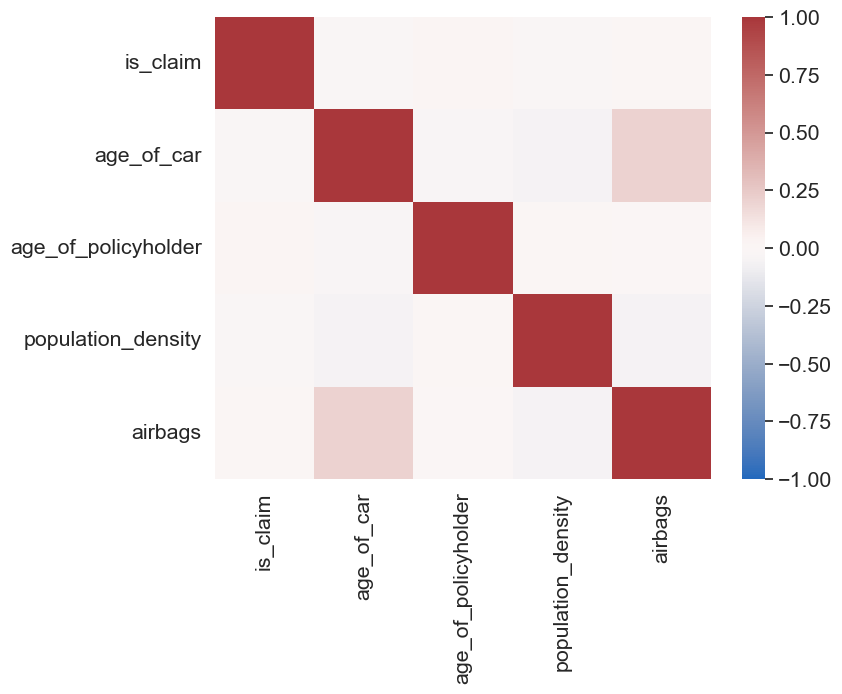

In [53]:
# Generate the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
heat =sns.heatmap(data=df.select(['is_claim', 'age_of_car', 'age_of_policyholder', 'population_density', 'airbags']).toPandas().corr(), cmap='vlag', vmin=-1, vmax=1)

In [ ]:
spark.stop()